In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df_data=pd.read_csv(r'F:\CIBR\project\Human Function Learning\choice_category.csv')
phase_ls=['P2','P2-only','P1']
phase=phase_ls[0]
subject='oct2202'
df_sub=df_data[df_data.subject==subject]
df_sub_dim1=df_sub[df_sub.phase==phase]
df =df_sub_dim1.reset_index(drop=True)

def calculate_angle(v1, v2):
    norm_v1 = np.linalg.norm(v1)
    norm_v2 = np.linalg.norm(v2)
    
    dot_product = np.dot(v1, v2)
    if (norm_v1 * norm_v2)==0:
        cos_theta = dot_product / (norm_v1 * norm_v2)
        angle = np.arccos(np.clip(cos_theta, -1.0, 1.0))
    else:
        cos_theta = dot_product / (norm_v1 * norm_v2)
        angle = np.arccos(np.clip(cos_theta, -1.0, 1.0))
    return np.degrees(angle)

angles = []
optimization_vec=[]
subject_act_vec=[]

if phase=='P1':
    for i in range(1, len(df) - 1):

        v1 = np.array([df.loc[i, 'dim1_choice_value'] - df.loc[i-1, 'dim1_choice_value'],
                       df.loc[i, 'dim2_choice_value'] - df.loc[i-1, 'dim2_choice_value'],
                       df.loc[i, 'dim3_choice_value'] - df.loc[i-1, 'dim3_choice_value']
                 ])

        v2 = np.array([df.loc[i+1, 'dim1_choice_value'] - df.loc[i, 'dim1_choice_value'],
                       df.loc[i+1, 'dim2_choice_value'] - df.loc[i, 'dim2_choice_value'],
                       df.loc[i+1, 'dim3_choice_value'] - df.loc[i, 'dim3_choice_value']
                     ])
        delta_points=df.loc[i, 'score'] - df.loc[i-1, 'score'] 
        delta_points = delta_points if abs(delta_points) >4 else 0 #将分数变化小于4的视为0，减小噪声对角度的影响
        if delta_points==0:
            v1_OD=v1
        else:
            v1_OD=v1*np.array([delta_points])


        angle = calculate_angle(v2, v1_OD)
        subject_act_vec.append(v2)
        optimization_vec.append(v1_OD)
        angles.append(angle)
else:
    for i in range(1, len(df) - 1):

        v1 = np.array([df.loc[i, 'dim1_choice_value'] - df.loc[i-1, 'dim1_choice_value'],
                       df.loc[i, 'dim2_choice_value'] - df.loc[i-1, 'dim2_choice_value'],
                       df.loc[i, 'dim3_choice_value'] - df.loc[i-1, 'dim3_choice_value'],
                      df.loc[i, 'dim4_choice_value'] - df.loc[i-1, 'dim4_choice_value']])

        v2 = np.array([df.loc[i+1, 'dim1_choice_value'] - df.loc[i, 'dim1_choice_value'],
                       df.loc[i+1, 'dim2_choice_value'] - df.loc[i, 'dim2_choice_value'],
                       df.loc[i+1, 'dim3_choice_value'] - df.loc[i, 'dim3_choice_value'],
                      df.loc[i+1, 'dim4_choice_value'] - df.loc[i, 'dim4_choice_value']])
        delta_points=df.loc[i, 'score'] - df.loc[i-1, 'score'] 
        delta_points = delta_points if abs(delta_points) >4 else 0
        if delta_points==0:
            v1_OD=v1
        else:
            v1_OD=v1*np.array([delta_points])
    

        angle = calculate_angle(v2, v1_OD)
        subject_act_vec.append(v2)
        optimization_vec.append(v1_OD)
        angles.append(round(angle,3))


optimization_ls=[0 if theta < 90 else 1 for theta in angles]
df['optimization_vec']=[None] + [None]+ optimization_vec 
df['subject_act_vec'] = [None] + [None] +subject_act_vec
df['angle_between_round_vectors'] = [None] + [None]+ angles 
df['optimization']=[None] + [None]+optimization_ls

C:\Users\Windows11\AppData\Local\Temp\ipykernel_22288\721319391.py:15: RuntimeWarning: invalid value encountered in scalar divide
  cos_theta = dot_product / (norm_v1 * norm_v2)


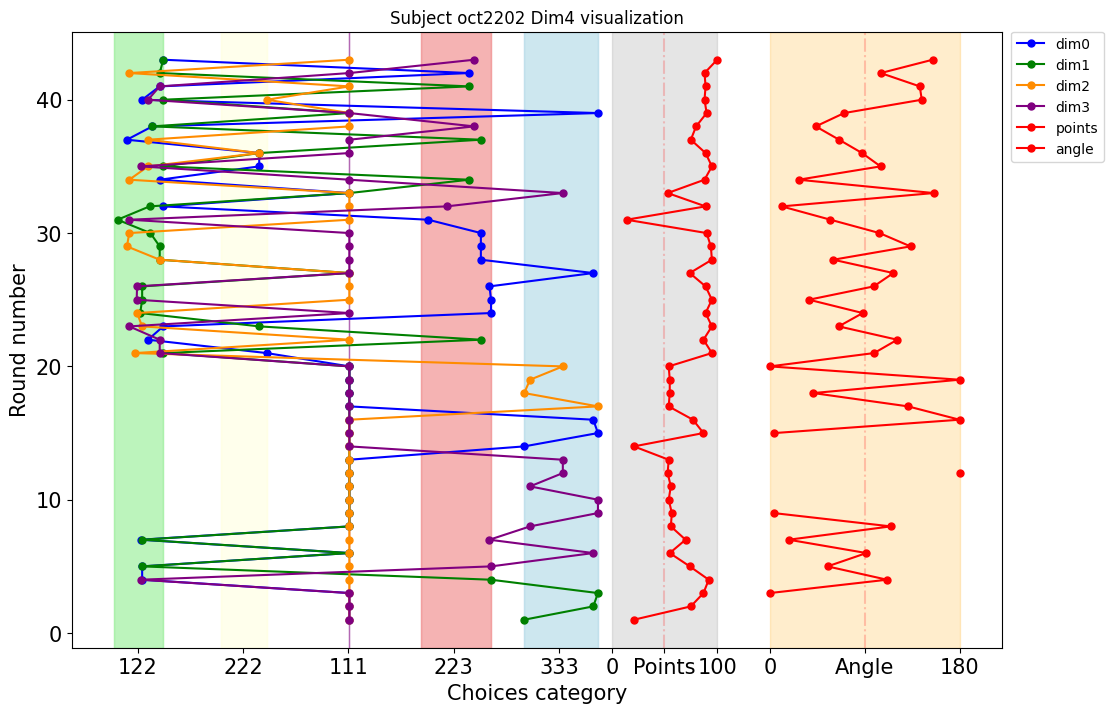

In [7]:
%matplotlib inline
choice_reward_pair=pd.read_csv(r'F:\CIBR\project\Human Function Learning\choice_reward_pair.csv')
range_minmax=choice_reward_pair.groupby('choices_category')['X_coord'].agg(['min','max']).reset_index()

color_ls=['blue', 'green', 'darkorange','purple']
plt.figure(figsize=(12,8))
for i,dim in enumerate(['X','Y','Z','T']):
#     plt.figure()
    color_dict={'333':'lightblue','223':'lightcoral','222':'lightyellow','122':'lightgreen','111':'purple','Points':'gray','angle_between_vec':'orange'}
    for category, group in range_minmax.groupby('choices_category')[['min','max']]:
        plt.axvspan(group['min'].values[0],group['max'].values[0], color=color_dict[str(category)], alpha=0.2)

    plt.title(f'Subject {subject} Dim{i+1} visualization')
    plt.plot(df_sub_dim1[dim],df_sub_dim1['round'],marker='o',label=f'dim{i}',c=color_ls[i],markersize=5)
plt.axvspan(500-27.593,600-27.593, color=color_dict['Points'], alpha=0.2)
plt.axvline(550-27.593, color='red',linestyle='dashdot', alpha=0.2)

plt.axvspan(650-27.593,830-27.593, color=color_dict['angle_between_vec'], alpha=0.2)
plt.axvline(740-27.593, color='red',linestyle='dashdot', alpha=0.2)
plt.plot(df_sub_dim1['score']+550-50-27.593,df_sub_dim1['round'],marker='o',label=f'points',c='r',markersize=5)
plt.plot(df['angle_between_round_vectors']+650-27.593,df_sub_dim1['round'],marker='o',label=f'angle',c='r',markersize=5)
plt.xticks([50-27.593,150-27.593,250-27.593,350-27.593,450-27.593,500-27.593,550-27.593,600-27.593,650-27.593,740-27.593,830-27.593],
           ['122','222','111','223','333','0','Points','100','0','Angle','180'],fontsize=15)

plt.ylabel('Round number',fontsize=15)
plt.xlabel('Choices category',fontsize=15)
plt.yticks(fontsize=15)
# plt.grid(axis='y')
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0)
plt.show()

In [10]:
df[['dim1_choice_value','dim2_choice_value','dim3_choice_value','dim4_choice_value','score','dim1','dim2','dim3','dim4','optimization_vec','subject_act_vec','angle_between_round_vectors']][:]

,dim1_choice_value,dim2_choice_value,dim3_choice_value,dim4_choice_value,score,dim1,dim2,dim3,dim4,optimization_vec,subject_act_vec,angle_between_round_vectors
0,34.074,0.000,34.074,34.074,21.0,"(1, 2, 3, 1, 2, 3, 1, 2, 3)","(3, 3, 3, 2, 2, 2, 1, 1, 1)","(1, 2, 3, 1, 2, 3, 1, 2, 3)","(1, 2, 3, 1, 2, 3, 1, 2, 3)",None,None,NaN
1,34.074,65.556,34.074,34.074,75.0,"(1, 2, 3, 1, 2, 3, 1, 2, 3)","(1, 1, 1, 3, 3, 3, 2, 2, 2)","(1, 2, 3, 1, 2, 3, 1, 2, 3)","(1, 2, 3, 1, 2, 3, 1, 2, 3)",None,None,NaN
2,34.074,70.000,34.074,34.074,87.0,"(1, 2, 3, 1, 2, 3, 1, 2, 3)","(1, 1, 1, 2, 2, 2, 3, 3, 3)","(1, 2, 3, 1, 2, 3, 1, 2, 3)","(1, 2, 3, 1, 2, 3, 1, 2, 3)","[0.0, 3540.024, 0.0, 0.0]","[0.0, 4.444000000000003, 0.0, 0.0]",0.000
3,37.407,68.519,34.074,35.926,92.0,"(1, 2, 3, 1, 1, 2, 2, 3, 3)","(1, 1, 1, 2, 2, 3, 2, 3, 3)","(1, 2, 3, 1, 2, 3, 1, 2, 3)","(1, 2, 3, 1, 1, 3, 2, 2, 3)","[0.0, 53.32800000000003, 0.0, 0.0]","[3.3329999999999984, -1.4809999999999945, 0.0,...",111.227
4,37.407,37.407,34.074,68.519,74.0,"(1, 2, 3, 1, 1, 2, 2, 3, 3)","(1, 2, 3, 1, 1, 2, 2, 3, 3)","(1, 2, 3, 1, 2, 3, 1, 2, 3)","(1, 1, 1, 2, 2, 3, 2, 3, 3)","[16.664999999999992, -7.404999999999973, 0.0, ...","[0.0, -31.11200000000001, 0.0, 32.593]",54.725
5,34.074,34.074,34.074,65.556,55.0,"(1, 2, 3, 1, 2, 3, 1, 2, 3)","(1, 2, 3, 1, 2, 3, 1, 2, 3)","(1, 2, 3, 1, 2, 3, 1, 2, 3)","(1, 1, 1, 3, 3, 3, 2, 2, 2)","[-0.0, 560.0160000000002, -0.0, -586.674000000...","[-3.3329999999999984, -3.3329999999999984, 0.0...",91.627
6,35.926,37.407,34.074,67.037,70.0,"(1, 2, 3, 1, 1, 3, 2, 2, 3)","(1, 2, 3, 1, 1, 2, 2, 3, 3)","(1, 2, 3, 1, 2, 3, 1, 2, 3)","(1, 1, 1, 2, 3, 3, 2, 2, 3)","[63.32699999999997, 63.32699999999997, -0.0, 5...","[1.8520000000000039, 3.3329999999999984, 0.0, ...",17.914
7,34.074,34.074,34.074,5.556,56.0,"(1, 2, 3, 1, 2, 3, 1, 2, 3)","(1, 2, 3, 1, 2, 3, 1, 2, 3)","(1, 2, 3, 1, 2, 3, 1, 2, 3)","(3, 3, 3, 1, 1, 1, 2, 2, 2)","[27.780000000000058, 49.994999999999976, 0.0, ...","[-1.8520000000000039, -3.3329999999999984, 0.0...",114.776
8,34.074,34.074,34.074,70.000,57.0,"(1, 2, 3, 1, 2, 3, 1, 2, 3)","(1, 2, 3, 1, 2, 3, 1, 2, 3)","(1, 2, 3, 1, 2, 3, 1, 2, 3)","(1, 1, 1, 2, 2, 2, 3, 3, 3)","[25.928000000000054, 46.66199999999998, -0.0, ...","[0.0, 0.0, 0.0, 64.444]",3.549
9,34.074,34.074,34.074,70.000,54.0,"(1, 2, 3, 1, 2, 3, 1, 2, 3)","(1, 2, 3, 1, 2, 3, 1, 2, 3)","(1, 2, 3, 1, 2, 3, 1, 2, 3)","(1, 1, 1, 2, 2, 2, 3, 3, 3)","[0.0, 0.0, 0.0, 64.444]","[0.0, 0.0, 0.0, 0.0]",NaN
